# **Cálculo simbólico en Python**

---

En Python se puede resolver las ecuaciones diferenciales y las ecuaciones algebraicas necesarias para linealizar un proceso no lineal y diseñarle un controlador.

Para resolver un sistema de ecuaciones lineales donde $c_2(t)=\dot{c_1}(t)$ y $c_1(t)=\dot{c_2}(t)$, se puede resolver mediante la función dsolve().

In [ ]:
from sympy import *
import numpy as np
init_printing(use_unicode=True)
x, y, z, t, w,  V=symbols('x y z t omega V')
c1=Function('c1')
c2=Function('c2')
# hq=symbols('hbar',positive=True)
g1=Eq(c2(t),Derivative(c1(t),t))
g2=Eq(c1(t),Derivative(c2(t),t))
eq=(g1,g2)
res=dsolve(eq,hint='all',ics={c1(0):1,c2(0):0})
# pretty_print(res)
res


⎡         t    -t           t    -t⎤
⎢        ℯ    ℯ            ℯ    ℯ  ⎥
⎢c₁(t) = ── + ───, c₂(t) = ── - ───⎥
⎣        2     2           2     2 ⎦

# **Linealización en el equilibrio inestable**

Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio inestable, se puede linealizar aplicando Taylor a las ecuaciones


<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta} 
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,0,0]^T$.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$. 


In [ ]:
from sympy import *
import numpy as np
init_printing(use_unicode=True)
#syms fi fi_p fi_pp p p_p p_pp M m u long Fricc g;
fi, fi_p, fi_pp, p, p_p, p_pp, M, m, u, long, Fricc, g=symbols('fi fi_p fi_pp p p_p p_pp M m u long Fricc g')
# p_pp=(1/(M+m))*(u-m*long*fi_pp+m*long*fi_p**2*fi-Fricc*p_p) #; %Pequeños angulos
Eq1=Eq(p_pp-(1/(M+m))*(u-m*long*fi_pp+m*long*fi_p**2*fi-Fricc*p_p),0)
#% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1 
Eq2=Eq(fi_pp-(1/long)*(g*fi-p_pp),0)
sol = solve((Eq1, Eq2),(p_pp, fi_pp))
# print(sol)
p_pp=sol[p_pp]
fi_pp=sol[fi_pp]
print('p_pp final es')
print(p_pp)
print('fi_pp final es')
print(fi_pp)

p_pp final es
(-Fricc*p_p + fi*fi_p**2*long*m - fi*g*m + u)/M
fi_pp final es
(Fricc*p_p + M*fi*g - fi*fi_p**2*long*m + fi*g*m - u)/(M*long)


Así, para el equilibrio inestable, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+\phi \cdot {\dot{\delta}}^2\cdot long\cdot m -\phi\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{Fricc \cdot \dot{\delta}+M \cdot \phi \cdot g- \phi \cdot{\dot{\phi}}^2\cdot long\cdot m + \phi\cdot g\cdot m-u}{M\cdot long} 
\end{cases}
\end{equation*}$
<!-- 
p_pp=
                      2                    
  -Fricc⋅p_p + fi⋅fi_p ⋅long⋅m - fi⋅g⋅m + u
  ─────────────────────────────────────────
                      M                    
fi_pp=
                              2                    
  Fricc⋅p_p + M⋅fi⋅g - fi⋅fi_p ⋅long⋅m + fi⋅g⋅m - u
  ─────────────────────────────────────────────────
                        M⋅long                             -->

Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\ddot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación .subs().

In [ ]:
Mat_A=[[0,1,0,0],
  [diff(p_pp, p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(p_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(p_pp, fi).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(p_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)],
  [0,0,0,1],
  [diff(fi_pp, p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(fi_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(fi_pp, fi).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0),
  diff(fi_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)]]
Mat_B=[[0],
 [diff(p_pp, u).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)],
 [0],
[diff(fi_pp, u).subs(p,0).subs(p_p,0).subs(fi,0).subs(fi_p,0)]]
# print(Mat_A)
# print(Mat_B)
pretty_print(Mat_A)
pretty_print(Mat_B)

⎡              ⎡   -Fricc   -g⋅m    ⎤                ⎡   Fricc   M⋅g + g⋅m   ⎤
⎢[0, 1, 0, 0], ⎢0, ───────, ─────, 0⎥, [0, 0, 0, 1], ⎢0, ──────, ─────────, 0⎥
⎣              ⎣      M       M     ⎦                ⎣   M⋅long    M⋅long    ⎦

⎤
⎥
⎦
⎡     ⎡1⎤       ⎡ -1   ⎤⎤
⎢[0], ⎢─⎥, [0], ⎢──────⎥⎥
⎣     ⎣M⎦       ⎣M⋅long⎦⎦


In [ ]:
Mat_A

⎡              ⎡   -Fricc   -g⋅m    ⎤                ⎡   Fricc   M⋅g + g⋅m   ⎤
⎢[0, 1, 0, 0], ⎢0, ───────, ─────, 0⎥, [0, 0, 0, 1], ⎢0, ──────, ─────────, 0⎥
⎣              ⎣      M       M     ⎦                ⎣   M⋅long    M⋅long    ⎦

⎤
⎥
⎦

In [ ]:
Mat_B

⎡     ⎡1⎤       ⎡ -1   ⎤⎤
⎢[0], ⎢─⎥, [0], ⎢──────⎥⎥
⎣     ⎣M⎦       ⎣M⋅long⎦⎦

Se requiere verificar el correcto desempeño de la linealización hecha mediante la simulación numérica mediante Euler.

**Simulación** del Péndulo con Python.
A continuación se muestra el resultado.


# **Verificación numérica y visualización gráfica**

# **Simulación numérica para el equilibrio inestable**



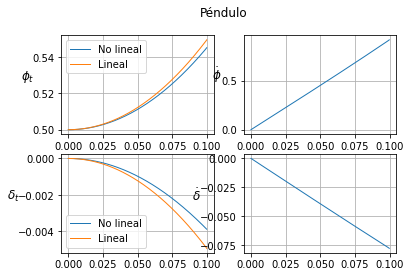

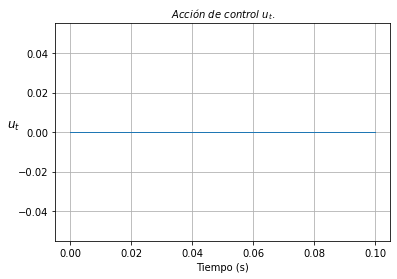

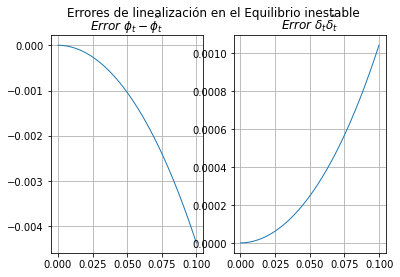

In [ ]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
from numpy.linalg import eig
m=.1;Fricc=0.1; long=.6;g=9.8;M=.5;
##%Versión linealizada en el equilibrio inestable. Sontag Pp 104.
##%            estado=[p(i); p_p(i); fi(i); omega(i)]
##Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 Fricc/(long*M) g*(m+M)/(long*M) 0];
##Mat_B=[0; 1/M; 0; -1/(long*M)];1
##Mat_C=[1 0 0 0]; %La salida es posición
h=1e-4;t_simul=.10; #Tiene que ser muy pequeño para que se vea que coinciden
Mat_A=np.array([[0. ,1. ,0. ,0.],[0.,-Fricc/M, -m*g/M,0.],[0., 0. ,0. ,1.],[0.,Fricc/(long*M) ,g*(m+M)/(long*M), 0.]])
Mat_B=np.array([[0.],[1/M],[0.],[-1./(long*M)]])
Mat_C=np.array([[1., 0., 0., 0.]])
fi=np.linspace(0,0,int(t_simul/h))
omega=np.linspace(0,0,int(t_simul/h))
p_p=np.linspace(0,0,int(t_simul/h))
u=np.linspace(0,0,int(t_simul/h))
p=np.linspace(0,0,int(t_simul/h))
y=np.linspace(0,0,int(t_simul/h))
y_o=np.linspace(0,0,int(t_simul/h))
p_O=np.linspace(0,0,int(t_simul/h))
fi_O=np.linspace(0,0,int(t_simul/h))
t=np.linspace(0,0,int(t_simul/h))
##fi(1)=.1; color='r';
##fi(1)=.2; color='g';
##fi(1)=.7; color='b';
fi[0]=.5
fi_O[0]=fi[0]
fi_pp=0.
u[0]=0.
estado=[[p[0]], [p_p[0]], [fi[0]], [omega[0]]]
x_hat=estado #Igual condiciones inicial es del sistema lineal
for ii in range(int(t_simul/h)-1):
    y[ii]=np.matmul(Mat_C,estado)    
    u[ii+1]=0.
    p_pp=(1/(M+m))*(u[ii]-m*long*fi_pp*cos(fi[ii])+(m*long*omega[ii]**2)*sin(fi[ii])-Fricc*p_p[ii])
    fi_pp=(1/long)*(g*sin(fi[ii])-p_pp*cos(fi[ii]))    
    y_o[ii]=np.matmul(Mat_C,x_hat)
    x_hatp = np.matmul(Mat_A,x_hat) + Mat_B*u[ii]   
    # x_hatp = Mat_A @ x_hat + Mat_B @ u[ii]     
    x_hat = x_hat + h*x_hatp;    
    p_p[ii+1]  =p_p[ii]+h*p_pp;
    p[ii+1]    =p[ii]+h*p_p[ii];
    omega[ii+1]=omega[ii]+h*fi_pp;
    fi[ii+1]   =fi[ii]+h*omega[ii];
    t[ii] = ii*h
    estado=[[p[ii+1]], [p_p[ii+1]], [fi[ii+1]], [omega[ii+1]]]
    p_O[ii+1]=x_hat[0] #El vector inicia en 0, en Octave en 1
    fi_O[ii+1]=x_hat[2]
t[ii+1] = ii*h
u[ii+1]=0.


fig, axs = plt.subplots(2,2)
fig.suptitle('Péndulo')
axs[0,0].plot(t, fi, linewidth =1.0)
axs[0,0].plot(t, fi_O, linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12) 
axs[0,1].plot(t, omega, linewidth =1.0)
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t[:-1], p[:-1], linewidth =1.0)
axs[1,0].plot(t, p_O, linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12) 
axs[1,1].plot(t, p_p, linewidth =1.0)
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )

#Acción de control
fig, ax1 = plt.subplots()
plt.plot(t, u, linewidth =1.0)
plt.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12) 
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
ax1.set_title('$Acción\ de\ control\ u_t.$', fontsize=10)

fig2, axs2 = plt.subplots(1,2)
fig2.suptitle('Errores de linealización en el Equilibrio inestable')
axs2[0].plot(t, fi-fi_O, linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\hat{\phi_t}$',rotation=0, fontsize=12) 
axs2[1].plot(t, p-p_O, linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t\hat{\delta_t}$',rotation=0, fontsize=12)
axs2[1].grid( True )

# **Linealización en el equilibrio estable**

Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio **estable**, se puede linealizar aplicando Taylor a las ecuaciones cuando $\phi \approx π$



<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} - m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = -g \cdot (\pi-\phi) - \ddot{\delta} 
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,\pi,0]^T$.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$. 


In [ ]:
from sympy import *
import numpy as np
init_printing(use_unicode=True)
#syms fi fi_p fi_pp p p_p p_pp M m u long Fricc g;
fi, fi_p, fi_pp, p, p_p, p_pp, M, m, u, long, Fricc, g=symbols('fi fi_p fi_pp p p_p p_pp M m u long Fricc g')
Eq1=Eq(p_pp-(1/(M+m))*(u+m*long*fi_pp+m*long*fi_p**2*(pi-fi)-Fricc*p_p),0)
#% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1 
Eq2=Eq(fi_pp-(1/long)*(g*(pi-fi)+p_pp),0)
sol = solve((Eq1, Eq2),(p_pp, fi_pp))
# print(sol)
p_pp=sol[p_pp]
fi_pp=sol[fi_pp]
print('p_pp final es')
print(p_pp)
print('fi_pp final es')
print(fi_pp)

p_pp final es
(-Fricc*p_p - fi*fi_p**2*long*m - fi*g*m + pi*fi_p**2*long*m + pi*g*m + u)/M
fi_pp final es
(-Fricc*p_p - M*fi*g + pi*M*g - fi*fi_p**2*long*m - fi*g*m + pi*fi_p**2*long*m + pi*g*m + u)/(M*long)


Así, para el equilibrio **estable**, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+(\pi-\phi) \cdot {\dot{\delta}}^2\cdot long\cdot m +(\pi-\phi)\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{-Fricc \cdot \dot{\delta}+M \cdot (\pi-\phi) \cdot g+ (\pi-\phi) \cdot{\dot{\phi}}^2\cdot long\cdot m + (\pi-\phi)\cdot g\cdot m+u}{M\cdot long} 
\end{cases}
\end{equation*}$


Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\ddot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación .subs().

In [ ]:
Mat_A=[[0,1,0,0],
  [diff(p_pp, p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(p_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(p_pp, fi).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(p_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)],
  [0,0,0,1],
  [diff(fi_pp, p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(fi_pp, p_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(fi_pp, fi).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0),
  diff(fi_pp, fi_p).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)]]
Mat_B=[[0],
 [diff(p_pp, u).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)],
 [0],
[diff(fi_pp, u).subs(p,0).subs(p_p,0).subs(fi,pi).subs(fi_p,0)]]
print(Mat_A)
print(Mat_B)
pretty_print(Mat_A)
pretty_print(Mat_B)

[[0, 1, 0, 0], [0, -Fricc/M, -g*m/M, 0], [0, 0, 0, 1], [0, -Fricc/(M*long), (-M*g - g*m)/(M*long), 0]]
[[0], [1/M], [0], [1/(M*long)]]
⎡              ⎡   -Fricc   -g⋅m    ⎤                ⎡   -Fricc   -M⋅g - g⋅m  
⎢[0, 1, 0, 0], ⎢0, ───────, ─────, 0⎥, [0, 0, 0, 1], ⎢0, ───────, ──────────, 
⎣              ⎣      M       M     ⎦                ⎣    M⋅long    M⋅long    

 ⎤⎤
0⎥⎥
 ⎦⎦
⎡     ⎡1⎤       ⎡  1   ⎤⎤
⎢[0], ⎢─⎥, [0], ⎢──────⎥⎥
⎣     ⎣M⎦       ⎣M⋅long⎦⎦


In [ ]:
Mat_A

⎡              ⎡   -Fricc   -g⋅m    ⎤                ⎡   -Fricc   -M⋅g - g⋅m  
⎢[0, 1, 0, 0], ⎢0, ───────, ─────, 0⎥, [0, 0, 0, 1], ⎢0, ───────, ──────────, 
⎣              ⎣      M       M     ⎦                ⎣    M⋅long    M⋅long    

 ⎤⎤
0⎥⎥
 ⎦⎦

In [ ]:
Mat_B

⎡     ⎡1⎤       ⎡  1   ⎤⎤
⎢[0], ⎢─⎥, [0], ⎢──────⎥⎥
⎣     ⎣M⎦       ⎣M⋅long⎦⎦

# **Simulación numérica para el equilibrio estable**

In [ ]:
import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *
from numpy.linalg import eig
m=.1;Fricc=0.1; long=.6;g=9.8;M=.5;
##%Versión linealizada en el equilibrio Estable. Sontag Pp 104.
##%            estado=[p(i); p_p(i); fi(i); omega(i)]
##Mat_A=[0 1 0 0;0 -Fricc/M -m*g/M 0; 0 0 0 1; 0 Fricc/(long*M) g*(m+M)/(long*M) 0];
##Mat_B=[0; 1/M; 0; -1/(long*M)];1
##Mat_C=[1 0 0 0]; %La salida es posición
h=1e-3;t_simul=10;
Mat_A=np.array([[0. ,1. ,0. ,0.],[0.,-Fricc/M, -m*g/M,0.],[0., 0. ,0. ,1.],[0.,-Fricc/(long*M) ,-g*(m+M)/(long*M), 0.]])
Mat_B=np.array([[0.],[1/M],[0.],[1./(long*M)]])
# Mat_C=np.array([[1., 0., 0., 0.],[0, 0., 1., 0.]]) #Para cuando y tiene dos componentes
Mat_C=np.array([[1., 0., 0., 0.]])
fi=np.linspace(0,0,int(t_simul/h))
omega=np.linspace(0,0,int(t_simul/h))
p_p=np.linspace(0,0,int(t_simul/h))
u=np.linspace(0,0,int(t_simul/h))
p=np.linspace(0,0,int(t_simul/h))
y=np.linspace(0,0,int(t_simul/h))
y_o=np.linspace(0,0,int(t_simul/h))
p_O=np.linspace(0,0,int(t_simul/h))
p_pO=np.linspace(0,0,int(t_simul/h))
fi_O=np.linspace(0,0,int(t_simul/h))
fi_pO=np.linspace(0,0,int(t_simul/h))
t=np.linspace(0,0,int(t_simul/h))
##fi(1)=.1; color='r';
##fi(1)=.2; color='g';
##fi(1)=.7; color='b';
fi[0]=3.5
fi_pp=0.
u[0]=0.
estado=[[p[0]], [p_p[0]], [fi[0]], [omega[0]]]
x_hat=np.array([[0.] ,[0.] ,[fi[0]],[0.]])
xOP=np.array([[0.] ,[0.] ,[pi] ,[0.]])
p_O[0]=x_hat[0] #El vector inicia en 0, en Octave en 1
p_pO[0]=x_hat[1]
fi_O[0]=x_hat[2]
fi_pO[0]=x_hat[3]
for ii in range(int(t_simul/h)-1):
    y[ii]=np.matmul(Mat_C,estado)    
    u[ii+1]=0. #Para accionar la fuerza
    p_pp=(1/(M+m))*(u[ii]-m*long*fi_pp*cos(fi[ii])+(m*long*omega[ii]**2)*sin(fi[ii])-Fricc*p_p[ii])
    fi_pp=(1/long)*(g*sin(fi[ii])-p_pp*cos(fi[ii]))
    y_o[ii]=np.matmul(Mat_C,x_hat)
    x_hatp = np.matmul(Mat_A,x_hat-xOP) + Mat_B*u[ii] 
    x_hat = x_hat + h*x_hatp;    
    p_p[ii+1]  =p_p[ii]+h*p_pp;
    p[ii+1]    =p[ii]+h*p_p[ii];
    omega[ii+1]=omega[ii]+h*fi_pp;
    fi[ii+1]   =fi[ii]+h*omega[ii];
    t[ii] = ii*h
    estado=[[p[ii+1]], [p_p[ii+1]], [fi[ii+1]], [omega[ii+1]]]
    p_O[ii+1]=x_hat[0] #El vector inicia en 0, en Octave en 1
    p_pO[ii+1]=x_hat[1]
    fi_O[ii+1]=x_hat[2]
    fi_pO[ii+1]=x_hat[3]
t[ii+1] = ii*h
u[ii+1]=0.

In [ ]:
# sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super
!apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apache2 | 

In [ ]:
!pip install SciencePlots
import matplotlib.pyplot as plt
plt.style.reload_library()
plt.style.use('science')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


FileNotFoundError: ignored

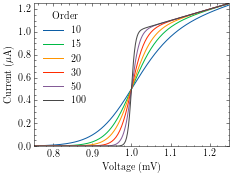

In [ ]:
"""Plot examples of SciencePlot styles."""

import numpy as np
import matplotlib.pyplot as plt


def model(x, p):
    return x ** (2 * p + 1) / (1 + x ** (2 * p))


pparam = dict(xlabel='Voltage (mV)', ylabel='Current ($\mu$A)')

x = np.linspace(0.75, 1.25, 201)

with plt.style.context(['science']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig1.pdf')
    fig.savefig('figures/fig1.jpg', dpi=300)

with plt.style.context(['science', 'ieee']):
    fig, ax = plt.subplots()
    for p in [10, 20, 40, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    # Note: $\mu$ doesn't work with Times font (used by ieee style)
    ax.set_ylabel(r'Current (\textmu A)')  
    fig.savefig('figures/fig2a.pdf')
    fig.savefig('figures/fig2a.jpg', dpi=300)

with plt.style.context(['science', 'ieee', 'std-colors']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    # Note: $\mu$ doesn't work with Times font (used by ieee style)
    ax.set_ylabel(r'Current (\textmu A)')  
    fig.savefig('figures/fig2b.pdf')
    fig.savefig('figures/fig2b.jpg', dpi=300)

with plt.style.context(['science', 'nature']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig2c.pdf')
    fig.savefig('figures/fig2c.jpg', dpi=300)

with plt.style.context(['science', 'scatter']):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot([-2, 2], [-2, 2], 'k--')
    ax.fill_between([-2, 2], [-2.2, 1.8], [-1.8, 2.2],
                    color='dodgerblue', alpha=0.2, lw=0)
    for i in range(7):
        x1 = np.random.normal(0, 0.5, 10)
        y1 = x1 + np.random.normal(0, 0.2, 10)
        ax.plot(x1, y1, label=r"$^\#${}".format(i+1))
    lgd = r"$\mathring{P}=\begin{cases}1&\text{if $\nu\geq0$}\\0&\text{if $\nu<0$}\end{cases}$"
    ax.legend(title=lgd, loc=2, ncol=2)
    xlbl = r"$\log_{10}\left(\frac{L_\mathrm{IR}}{\mathrm{L}_\odot}\right)$"
    ylbl = r"$\log_{10}\left(\frac{L_\circledast}{\mathrm{L}_\odot}\right)$"
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    fig.savefig('figures/fig3.pdf')
    fig.savefig('figures/fig3.jpg', dpi=300)

with plt.style.context(['science', 'high-vis']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig4.pdf')
    fig.savefig('figures/fig4.jpg', dpi=300)

with plt.style.context(['dark_background', 'science', 'high-vis']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig5.pdf')
    fig.savefig('figures/fig5.jpg', dpi=300)

with plt.style.context(['science', 'notebook']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig10.pdf')
    fig.savefig('figures/fig10.jpg', dpi=300)

# Plot different color cycles

with plt.style.context(['science', 'bright']):
    fig, ax = plt.subplots()
    for p in [5, 10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig6.pdf')
    fig.savefig('figures/fig6.jpg', dpi=300)

with plt.style.context(['science', 'vibrant']):
    fig, ax = plt.subplots()
    for p in [5, 10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig7.pdf')
    fig.savefig('figures/fig7.jpg', dpi=300)

with plt.style.context(['science', 'muted']):
    fig, ax = plt.subplots()
    for p in [5, 7, 10, 15, 20, 30, 38, 50, 100, 500]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order', fontsize=7)
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig8.pdf')
    fig.savefig('figures/fig8.jpg', dpi=300)

with plt.style.context(['science', 'retro']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig9.pdf')
    fig.savefig('figures/fig9.jpg', dpi=300)

with plt.style.context(['science', 'grid']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig11.pdf')
    fig.savefig('figures/fig11.jpg', dpi=300)

with plt.style.context(['science', 'high-contrast']):
    fig, ax = plt.subplots()
    for p in [10, 20, 50]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig12.pdf')
    fig.savefig('figures/fig12.jpg', dpi=300)

with plt.style.context(['science', 'light']):
    fig, ax = plt.subplots()
    for p in [5, 7, 10, 15, 20, 30, 38, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order', fontsize=7)
    ax.autoscale(tight=True)
    ax.set(**pparam)
    fig.savefig('figures/fig13.pdf')
    fig.savefig('figures/fig13.jpg', dpi=300)

# Note: You need to install the Noto Serif CJK Fonts before running 
# examples 14 and 15. See FAQ in README.

with plt.style.context(['science', 'no-latex', 'cjk-tc-font']):
    fig, ax = plt.subplots()
    for p in [5, 7, 10, 15, 20, 30, 38, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order', fontsize=7)
    ax.set(xlabel=r'電壓 (mV)')
    ax.set(ylabel=r'電流 ($\mu$A)')
    ax.autoscale(tight=True)
    fig.savefig('figures/fig14a.jpg', dpi=300)

with plt.style.context(['science', 'no-latex', 'cjk-sc-font']):
    fig, ax = plt.subplots()
    for p in [5, 7, 10, 15, 20, 30, 38, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order', fontsize=7)
    ax.set(xlabel=r'电压 (mV)')
    ax.set(ylabel=r'电流 ($\mu$A)')
    ax.autoscale(tight=True)
    fig.savefig('figures/fig14b.jpg', dpi=300)

with plt.style.context(['science', 'no-latex', 'cjk-jp-font']):
    fig, ax = plt.subplots()
    for p in [5, 7, 10, 15, 20, 30, 38, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order', fontsize=7)
    ax.set(xlabel=r'電圧 (mV)')
    ax.set(ylabel=r'電気 ($\mu$A)')
    ax.autoscale(tight=True)
    fig.savefig('figures/fig14c.jpg', dpi=300)

with plt.style.context(['science', 'no-latex', 'cjk-kr-font']):
    fig, ax = plt.subplots()
    for p in [5, 7, 10, 15, 20, 30, 38, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order', fontsize=7)
    ax.set(xlabel=r'전압 (mV)')
    ax.set(ylabel=r'전류 ($\mu$A)')
    ax.autoscale(tight=True)
    fig.savefig('figures/fig14d.jpg', dpi=300)

# import matplotlib
# matplotlib.use('pgf')  # stwich backend to pgf
# matplotlib.rcParams.update({
#     "pgf.preamble": [
#         "\\usepackage{fontspec}",
#         '\\usepackage{xeCJK}',
#         r'\setmainfont{Times New Roman}',  # EN fonts Romans
#         r'\setCJKmainfont{SimHei}',  # set CJK fonts as SimSun
#         r'\setCJKsansfont{SimHei}',
#         r'\newCJKfontfamily{\Song}{SimSun}',
#         ]
# })

# with plt.style.context(['science', 'cjk-tc-font']):
#     fig, ax = plt.subplots()
#     for p in [5, 7, 10, 15, 20, 30, 38, 50, 100]:
#         ax.plot(x, model(x, p), label=p)
#     ax.legend(title='Order', fontsize=7)
#     ax.set(xlabel=r'電壓 (mV)') 
#     ax.set(ylabel=r'電流 ($\mu$A)')
#     ax.autoscale(tight=True)
#     fig.savefig('figures/fig15.pdf', backend='pgf')

with plt.style.context(['science', 'russian-font']):
    fig, ax = plt.subplots()
    for p in [5, 7, 10, 15, 20, 30, 38, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title=r'Число', fontsize=7)
    ax.set(xlabel=r'Напряжение (mV)')
    ax.set(ylabel=r'Сила тока ($\mu$A)')
    ax.autoscale(tight=True)
    fig.savefig('figures/fig16.jpg', dpi=300)

ValueError: ignored

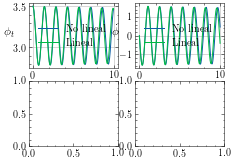

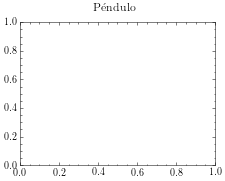

In [ ]:
with plt.style.context('science'):
    # plt.figure()
    # plt.plot(x, y)
    # plt.show()
  fig, axs = plt.subplots(2,2)
  fig, ax1 = plt.subplots()

fig.suptitle('Péndulo')
axs[0,0].plot(t, fi, linewidth =1.0)
axs[0,0].plot(t, fi_O, linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12) 
axs[0,1].plot(t, omega, linewidth =1.0)
axs[0,1].plot(t, fi_pO, linewidth =1.0)
axs[0,1].legend(["No lineal","Lineal"])
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t, p, linewidth =1.0)
axs[1,0].plot(t, p_O, linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12) 
axs[1,1].plot(t, p_p, linewidth =1.0)
axs[1,1].plot(t, p_pO, linewidth =1.0)
axs[1,1].legend(["No lineal","Lineal"])
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )
#Acción de control
fig, ax1 = plt.subplots()
plt.plot(t, u, linewidth =1.0)
plt.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12) 
ax1.set_xlabel('Tiempo (s)')
#ax1.set_title(r'$\ddot{o}\acute{e}\grave{e}\hat{O}'
#             r'\breve{i}\bar{A}\tilde{n}\vec{q}$', fontsize=20)
ax1.set_title('$Acción\ de\ control\ u_t.$', fontsize=10)

# fig2, axs2 = plt.subplots(1,2)
fig2.suptitle('Errores de linealización en el Equilibrio estable')
axs2[0].plot(t, fi-fi_O, linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\phi_L$',rotation=0, fontsize=12) 
axs2[1].plot(t, p-p_O, linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t-\delta_L$',rotation=0, fontsize=12)
axs2[1].grid( True )

# Cierre


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Recordar que para el simbolico de Octave hay que instalar los paquetes. 